In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from imageloadd import MasterImage

In [ ]:
path = '/content/drive/MyDrive/IAI PROJECT/'

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import tensorflow as tf
from tensorflow import keras
import csv
import pickle
import shutil
import pandas as pd
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
!git clone https://github.com/rajeevratan84/image-segmentation-keras.git
%cd image-segmentation-keras
!python setup.py install
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=50 ,  input_height=1200, input_width=1920)

Cloning into 'image-segmentation-keras'...
remote: Enumerating objects: 1165, done.
remote: Total 1165 (delta 0), reused 0 (delta 0), pack-reused 1165
Receiving objects: 100% (1165/1165), 3.29 MiB | 6.44 MiB/s, done.
Resolving deltas: 100% (752/752), done.
/content/image-segmentation-keras
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  o

In [ ]:
train_images =  str("/content/drive/MyDrive/IAI PROJECT/train/input")
train_annotations = str("/content/drive/MyDrive/IAI PROJECT/train/labels")

test_images =  str("/content/drive/MyDrive/IAI PROJECT/test/input")
test_annotations = str("/content/drive/MyDrive/IAI PROJECT/test/labels")


In [ ]:
x_train= glob.glob(os.path.join(train_images,"*.jpg"))
len(x_train)
y_train= glob.glob(os.path.join(train_annotations,"*.png"))
len(y_train)
x_test= glob.glob(os.path.join(test_images,"*.jpg"))
len(x_test)
y_test= glob.glob(os.path.join(test_annotations,"*.png"))
len(y_test)


1672

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=30,           #rotate the image 30 degrees
                               rescale=1/255,               #Rescale the image by normalizing it
                               width_shift_range=0.1,       #shift the pic width by the max of 10%
                               height_shift_range=0.1,      #shift the pic height by a max of 10 %
                               shear_range=0.2,             #Shear means cutting away part of the image
                               zoom_range=0.2,              #ZOom in maby 20%percen max
                               horizontal_flip=True,
                               fill_mode='nearest')

(1200, 1920)

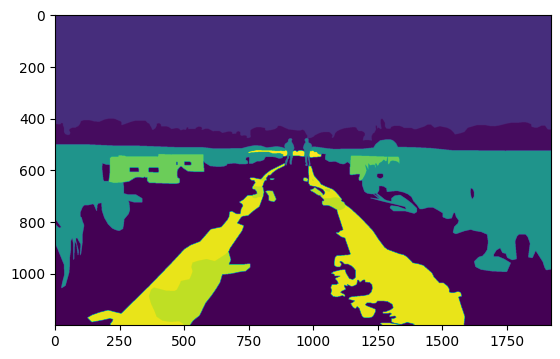

In [ ]:
x=plt.imread('/content/drive/MyDrive/IAI PROJECT/train/labels/frame000000-1581624075_250.png')
plt.imshow(x)
x.shape

In [ ]:
image_shape=(1200, 1920)

In [ ]:
batch_size=8
test_image_gen=image_gen.flow_from_directory("/content/drive/MyDrive/IAI PROJECT/test",
                                              target_size=image_shape[:2],
                                              batch_size=batch_size)
test_labels_gen=image_gen.flow_from_directory("/content/drive/MyDrive/IAI PROJECT/train/labels",
                                              target_size=image_shape[:2],
                                              batch_size=batch_size)

Found 3344 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [ ]:

mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(train_x, train_annotations,epochs=100,verbose=0,callbacks=[es], validation_data=(test_images, test_annotations))

In [ ]:
# model.train(
#     train_images =  "/content/drive/MyDrive/IAI PROJECT/train/input",
#     train_annotations = "/content/drive/MyDrive/IAI PROJECT/train/labels",
#     checkpoints_path = "/tmp/vgg_unet_1" , epochs=50 )


In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(unet_model, 'wb'))


In [ ]:

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)